In [1]:
!pip install vaderSentiment

In [65]:
from utils import *
from tweet_utils import *

In [66]:
import textblob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

plt.rcParams['figure.figsize'] = [20, 8]

In [67]:
plt.rcParams['figure.figsize'] = [20, 8]

# Read tweets csv
df = pd.read_csv("../../data/Tweets3WeeksLocations.csv")

# Drop all-null rows if any
df.dropna(how='all', inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)

/Users/ateendraramesh/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,27,29,31,40,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [68]:
# Vader sentiment
vader = SentimentIntensityAnalyzer()

In [69]:
labels = process_acled_csv("../../data/1900-01-01-2019-03-23-India.csv", top_locations=-1)

Data from 2019-02-22 00:00:00 to 2019-03-16 00:00:00  & Number of days - 23
Kolkata
Jabbowal
Chamyari
Ludhiana
Moga
Malout
Doraha
Moradabad
Bhanri
Bathinda
Harchandpur
Phaltan
Tarn Taran
Machilipatnam
Mumbai-Bandra
Mahabubnagar
Madurai
Hyderabad
Bengaluru
Ongole
Bhubaneswar
Heirok
Tamenglong
Itanagar
Jamshedpur
Pune
Patiala
Tezpur
Nabha
Jhaneri
Dhakuakhana
Agartala
Thiruvananthapuram
Warangal
Surat
Indiranagar
Jhansi
Chennai
Singhee
Ramagundam
Thiruthani
Gandhinagar
Samana
Jalandhar
Muktsar
Kapurthala
Khamano
Jammu
Mansa
Srinagar
Baramulla
Samalkha
Usilampatti
Yerravaripallem
Vaniyambadi
Cherlagudipadu
Guntur
Sohna
Sunpura
Delhi-New Delhi
Hussainpura
Guruzala
Mendhar
Rafiabad
Lucknow
Cuttack
Adityapur
Venkatagiri
Ranchi
Garhwa
Changanassery
Jagdalpur
Hoshiarpur
Kasumari
Amguri
Longchem
Port Blair
Kannur
Behali
Kokrajhar
Kasaragod
Vijayawada
Coimbatore
Kochi
Samse
Faridabad
Gurgaon
Ukkamba
Patna
Varanasi
Naharlagun
Saligao
Khambhat
Ranbir Singh Pura
Raipur
Haluwating
Daria
Gangtok
Silch

In [70]:
len(labels['Kochi'])

16

In [71]:
def clean_df(df):
    """
    Input - A df of tweets
    Returns - A df that cleans the input 
             df and returns it.
    """
    rows_to_drop = []
    for i in range(len(df)):
        curr_row = df.iloc[i]
        
        if pd.isna(curr_row['id']):
            rows_to_drop.append(i)
        
        if (pd.isna(curr_row['full_text'])) or pd.isna(curr_row['created_at']) or not str(curr_row['created_at']).endswith("2019"):
            rows_to_drop.append(i)
        
        if curr_row['lang'] == '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>':
            rows_to_drop.append(i)
    print ("Dropping", len(rows_to_drop), "rows!")
    if len(rows_to_drop) == 0:
        return df
    return df.drop(rows_to_drop)

df = clean_df(df)

Dropping 1 rows!


In [72]:
def get_sentiment(df):
    """
    Input - A dataframe of tweets from the CSV file.
    Returns - A df with an extra sentiment column.
    """
    vader = SentimentIntensityAnalyzer()
    
    tweets = df['full_text']

    tweet_ids = [str(int(x)) for x in df['id']]
    
    sentiment_dict = {}

    for i, tweet in enumerate(tweets):
        if tweet_ids[i] not in sentiment_dict:
            sentiment_dict[tweet_ids[i]] = vader.polarity_scores(tweet)

    neg, pos, neu, compound = [], [], [], []

    for i in range(len(df)):
        row = df.iloc[i]
        tweet_id = str(int(row['id']))
        sentiment = sentiment_dict[tweet_id]
        neg.append(sentiment['neg'])
        pos.append(sentiment['pos'])
        neu.append(sentiment['neu'])
        compound.append(sentiment['compound'])
    
    df['neg'] = neg
    df['neu'] = neu
    df['pos'] = pos
    df['compound'] = compound
    return df

get_sentiment(df)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,userstatuses_count,userfollowing,userfollow_request_sent,usercontributors_enabled,extractedlocation,finallocation,neg,neu,pos,compound
0,NaN,NaN,Tue Mar 05 04:05:13 +0000 2019,"[26, 264]","{'hashtags': [{'text': 'Telangana', 'indices':...",NaN,3.0,False,@Tejaswini7 @picchapakodi Telangana voters iss...,NaN,...,4178.0,NaN,NaN,False,"india, telangana",Hyderabad,0.073,0.844,0.083,0.1154
1,NaN,NaN,Tue Mar 05 04:05:13 +0000 2019,"[26, 264]","{'hashtags': [{'text': 'Telangana', 'indices':...",NaN,3.0,False,@Tejaswini7 @picchapakodi Telangana voters iss...,NaN,...,4178.0,NaN,NaN,False,"india, telangana",India,0.073,0.844,0.083,0.1154
2,NaN,NaN,Mon Mar 04 14:20:40 +0000 2019,"[0, 277]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1102574234897924096, 'id_str...",3.0,False,This kind of Atrocities are being faced by BJP...,NaN,...,32019.0,NaN,NaN,False,west bengal,Kolkata,0.178,0.822,0.000,-0.8534
3,NaN,NaN,Mon Mar 04 17:56:29 +0000 2019,"[0, 264]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1102628641668763650, 'id_str...",2.0,False,Pro-Naxal Forum Takes Out Anti-war Rally in Ko...,NaN,...,17589.0,NaN,NaN,False,"kolkata, west bengal",Kolkata,0.133,0.759,0.108,-0.2960
4,NaN,NaN,Mon Mar 04 06:42:10 +0000 2019,"[0, 123]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0.0,False,West Bengal police baton-charges BJP workers t...,NaN,...,10009.0,NaN,NaN,False,west bengal,Kolkata,0.121,0.879,0.000,-0.2960
5,NaN,NaN,Tue Mar 05 02:10:23 +0000 2019,"[0, 281]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,1.0,False,bound to happen. What's wrong in saying 'there...,NaN,...,833.0,NaN,NaN,False,"bangalore, karnataka",Bengaluru,0.177,0.725,0.098,-0.6572
6,NaN,NaN,Tue Mar 05 05:39:32 +0000 2019,"[0, 255]","{'hashtags': [{'text': 'WhyTheyHateModi', 'ind...",NaN,0.0,False,"West Bengal Bike Rally, How you beat your own ...",NaN,...,4070.0,NaN,NaN,False,west bengal,Kolkata,0.071,0.876,0.053,-0.2023
7,NaN,NaN,Mon Mar 04 07:30:39 +0000 2019,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0.0,False,BJP workers clash with police in West Bengal; ...,NaN,...,20687.0,NaN,NaN,False,west bengal,Kolkata,0.000,0.808,0.192,0.4215
8,NaN,NaN,Mon Mar 04 12:44:50 +0000 2019,"[0, 221]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1102550450874839040, 'id_str...",2.0,False,@ABVPVoice planing to create Danga ( Riots ) i...,NaN,...,1051.0,NaN,NaN,False,west bengal,Kolkata,0.223,0.710,0.068,-0.7003
9,NaN,NaN,Mon Mar 04 06:42:15 +0000 2019,"[0, 88]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,2.0,False,Police prevents BJP bike rally in West Bengal;...,NaN,...,37520.0,NaN,NaN,False,west bengal,Kolkata,0.000,0.885,0.115,0.0772


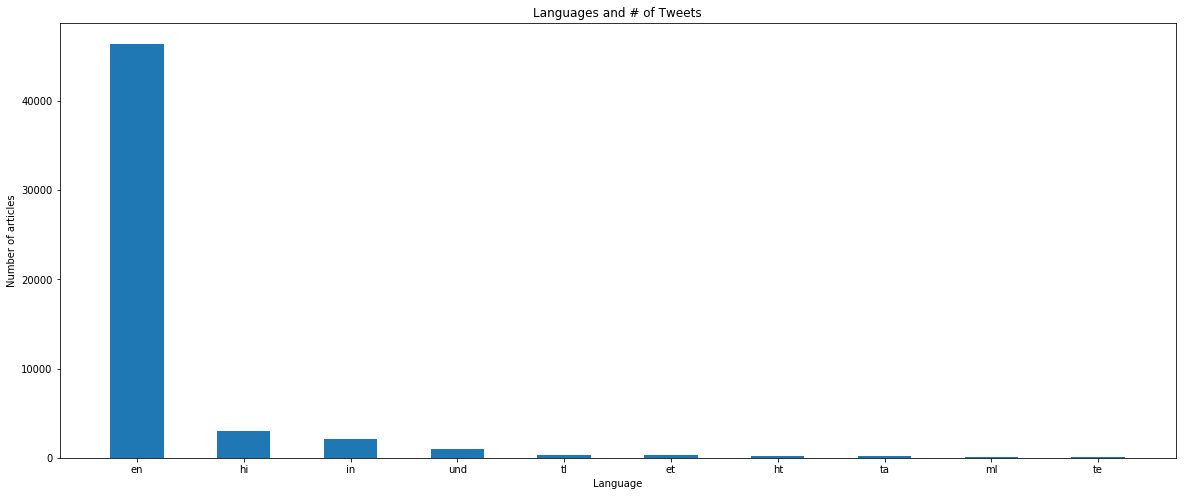

In [73]:
lang_count = Counter(df['lang'])
del lang_count['<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>']
lang_count = sorted(lang_count.items(), key=lambda x: -x[1])

counter = np.array(lang_count)[:10]
places, counts = counter[:, 0].tolist(), counter[:, 1].astype(np.float32)
indices = np.arange(len(counts))
width = 1

plt.xlabel("Language")
plt.ylabel("Number of articles")
plt.interactive(True)

plt.xticks(indices, places)
plt.title("Languages and # of Tweets")
_ = plt.bar(indices, counts, 0.5)

In [74]:
df['created_at'] = pd.to_datetime(df['created_at'])
# Sort by time created
df.sort_values(by=['created_at'], inplace=True)

In [75]:
def get_tweets_by_day(df, min_date=None, max_date=None):
    """
    Input - A df with created_at column
           converted by pd.to_datetime
    Returns - A dict with date as key and
             tweets on that date as values
    """
    if min_date is None:
        min_date = min(df['created_at']).date()
    
    if max_date is None:
        max_date = max(df['created_at']).date()
    
    date_dict = {}
    
    assert(max_date > min_date)
    
    date_range = pd.date_range(min_date, max_date)
    
    dates = [x.date() for x in df['created_at']]
    
    df['date'] = dates
    
    for date in date_range:
        tweets = df[df['date'] == date.date()]
        
        if len(tweets) == 0:
            date_dict[str(date)] = None
        else:
            date_dict[str(date)] = tweets
    del df['date']
    return date_dict

def get_tweets_by_location(df):
    """
    Input - Tweets DF with location
    Returns - Dict with location as key and tweets
              as the value
    """
    locations = pd.unique(df.finallocation)

    location_dict = {}

    for location in locations:
        location_dict[location] = df[df['finallocation'] == location]
    
    return location_dict

In [76]:
min_date, max_date = df.iloc[0]['created_at'], df.iloc[-1]['created_at']
print(min_date, max_date)
location_dict = get_tweets_by_location(df)

location_date_dict = {}

for location in location_dict.keys():
    print(location)
    date_dict = get_tweets_by_day(location_dict[location], min_date, max_date)
    location_date_dict[location] = date_dict

2019-02-23 05:35:52 2019-03-19 23:52:51
Bathinda
Chandigarh
Ludhiana
Amritsar


/Users/ateendraramesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Jalandhar
Patiala
Sangrur
Bengaluru
Delhi-New Delhi
Karnal
Gurgaon
India
Thiruvananthapuram
Dehradun
Lucknow
Pulwama
Hyderabad
Kolkata
Ahmedabad
Guwahati
Chennai
Tiruchirappalli
Coimbatore
Madurai
Salem
Puducherry
Imphal
Agartala
Jammu
Ranchi
Shimla
Patna
Jaipur
Srinagar


### Current Features
   * Number of tweets each day
   * Average pos, neg, neu and compound features
   * Tweet count with neg sentiment

### TODO
   * Hate speech
   * Violent speech

In [77]:
def get_features(date_dict):
    """
    Input: date_dict to compute features for each date
    Returns: Features for each date
    """
    features = []
    for date in date_dict:
        feature_row = []
        tweets = date_dict[date]
        if tweets is None:
            feature_row = [0] * 6
        else:
            feature_row.append(len(tweets))
            mean = tweets.mean()

            feature_row.extend([mean['pos'], mean['neg'], mean['neu'], mean['compound']])
            feature_row.append(len(tweets[tweets['neg'] > 0]))

        features.append(feature_row)
    return features

In [78]:
location_features_dict = {}
for location in location_date_dict:
    location_features_dict[location] = get_features(location_date_dict[location])
    print(location, "done")

Bathinda done
Chandigarh done
Ludhiana done
Amritsar done
Jalandhar done
Patiala done
Sangrur done
Bengaluru done
Delhi-New Delhi done
Karnal done
Gurgaon done
India done
Thiruvananthapuram done
Dehradun done
Lucknow done
Pulwama done
Hyderabad done
Kolkata done
Ahmedabad done
Guwahati done
Chennai done
Tiruchirappalli done
Coimbatore done
Madurai done
Salem done
Puducherry done
Imphal done
Agartala done
Jammu done
Ranchi done
Shimla done
Patna done
Jaipur done
Srinagar done
